In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [84]:
data_play = pd.read_csv("/content/googleplaystore.csv")

In [85]:
dataplay = data_play.copy(deep =True)

In [86]:
dataplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [87]:
# Basic Information Retrival
def basic_infos(data):
    print("Dataset shape is: ", data.shape,"\n")
    print("Dataset columns are: ",data.columns,"\n")
    print("Dataset dimensions are:",data.ndim,"\n")
    print("Dataset information is:\n",data.info(),"\n")
    categorical, numerical = [], []
    for i in data.columns:
        if dataplay[i].dtype==object:
            categorical.append(i)
        else:
            numerical.append(i)
    print("Categorical datatype columns are: ", [i for i in categorical],"\n")
    print("Numercial datatype columns are: ", [i for i in numerical],"\n")

In [88]:
basic_infos(dataplay)


Dataset shape is:  (10841, 13) 

Dataset columns are:  Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object') 

Dataset dimensions are: 2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833

In [89]:
print(dataplay.loc[10472, "Category"])
print(dataplay.loc[10472, "Rating"])

1.9
19.0


In [90]:
dataplay.loc[10472, "Category"] = "LIFESTYLE"
dataplay.loc[10472, "Rating"] = 1.9
dataplay.loc[10472, "Reviews"] = 19
dataplay.loc[10472, "Size"] = "3.0M"
dataplay.loc[10472, "Installs"] = "1000+"
dataplay.loc[10472, "Type"] = "Free"
dataplay.loc[10472, "Price"] = "0"
dataplay.loc[10472, "Content Rating"] = "Everyone"
dataplay.loc[10472, "Genres"] = "Lifestyle"
dataplay.loc[10472, "Last Updated"] = "February 11, 2018"
dataplay.loc[10472,"Current Ver"] = "1.0.19"
dataplay.loc[10472, "Android Ver"] = "4.0 and up"

In [91]:
dataplay['Reviews'] = dataplay['Reviews'].astype(int)

In [92]:
def replace_in_in_price(price):
    if price == '0':
        price = 0
        return price
    elif '$' in price:
        price = price.replace("$","")
        return float(price)
dataplay['Price'] = dataplay["Price"].apply(lambda x: replace_in_in_price(x))
dataplay['Price'].dtype

dtype('float64')

In [93]:
# For now we will convert the Last Updated into date-time format for easy continuing
dataplay['Last Updated'] = pd.to_datetime(dataplay['Last Updated'])
dataplay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10841 non-null  int64         
 4   Size            10841 non-null  object        
 5   Installs        10841 non-null  object        
 6   Type            10840 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10839 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 1.1+ MB


In [94]:
#Let's see about Nan values
print(dataplay.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


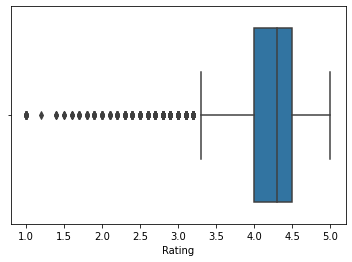

In [95]:
#We can see that there's some outliers, so for now in this case using Median as way for Fillna() is a better choice

sns.boxplot(dataplay['Rating'])

In [96]:
#Using Median for Rating

dataplay["Rating"] = dataplay['Rating'].fillna(dataplay['Rating'].median())

#Using Mode for Type and Android Ver

dataplay['Type'] = dataplay['Type'].fillna(dataplay['Type'].mode()[0])
dataplay['Android Ver'] = dataplay['Android Ver'].fillna(dataplay['Android Ver'].mode()[0])
dataplay.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       0
dtype: int64

In [24]:
#Data Visulaization

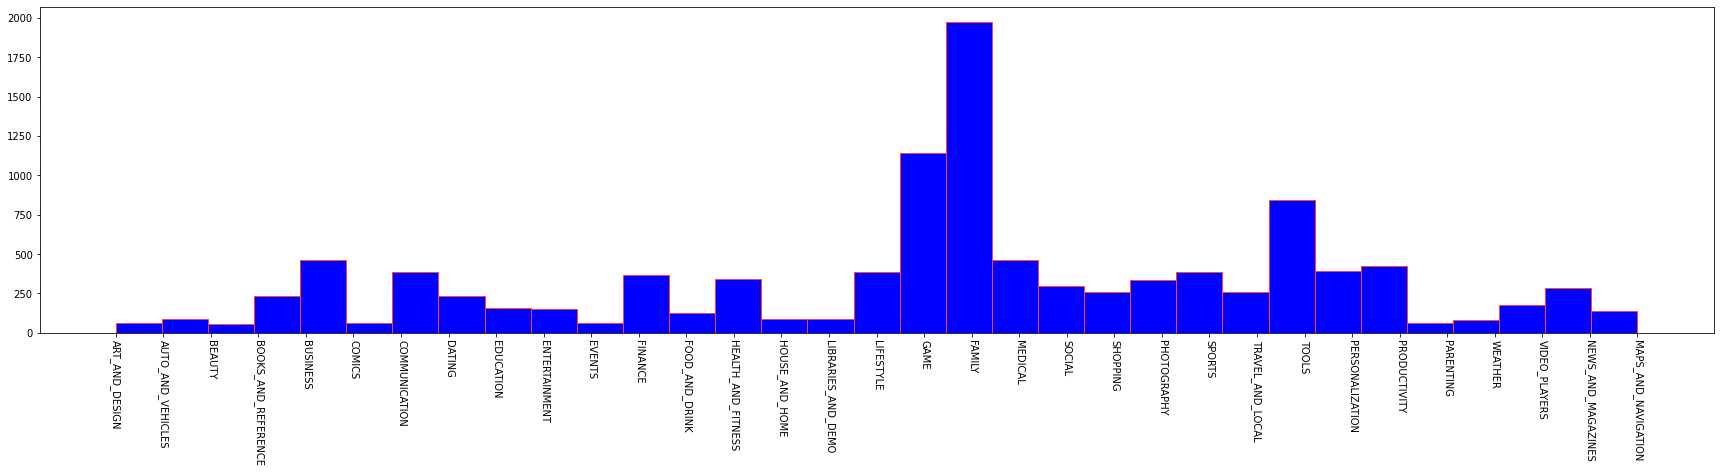

In [97]:
plt.figure(figsize=(30,6))
plt.hist(dataplay['Category'], bins = len(dataplay['Category'].value_counts()), edgecolor="#FF4040",color  ="Blue", histtype='bar')
plt.xticks(rotation=-90)   #rotates the info on x-axis
plt.show()

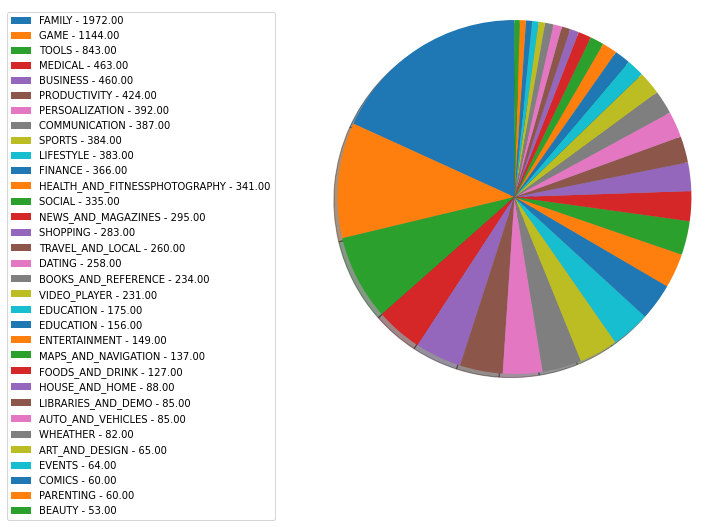

In [98]:
#Let's see the same in the form of a pie chart

#plt.figure(figsize=(100,80))
labels=['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'BUSINESS', 'PRODUCTIVITY',\
       'PERSOALIZATION', 'COMMUNICATION', 'SPORTS', 'LIFESTYLE', 'FINANCE', 'HEALTH_AND_FITNESS'\
       'PHOTOGRAPHY', 'SOCIAL', 'NEWS_AND_MAGAZINES', 'SHOPPING', 'TRAVEL_AND_LOCAL', 'DATING', 'BOOKS_AND_REFERENCE', 'VIDEO_PLAYER',\
       'EDUCATION', 'EDUCATION', 'ENTERTAINMENT', 'MAPS_AND_NAVIGATION', 'FOODS_AND_DRINK', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'AUTO_AND_VEHICLES',\
       'WHEATHER', 'ART_AND_DESIGN', 'EVENTS', 'COMICS', 'PARENTING', 'BEAUTY']
sizes = dataplay['Category'].value_counts()
fig, ax=plt.subplots()

patches, texts = ax.pie(sizes,shadow=True, startangle=90)

labels = ['{0} - {1:1.2f}'.format(i,j) for i, j in zip(labels,sizes)]
sort_legend = False

plt.legend(patches, labels, loc= 'best', bbox_to_anchor=(-0.1, 1.), fontsize = 10)
ax.axis('equal')
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


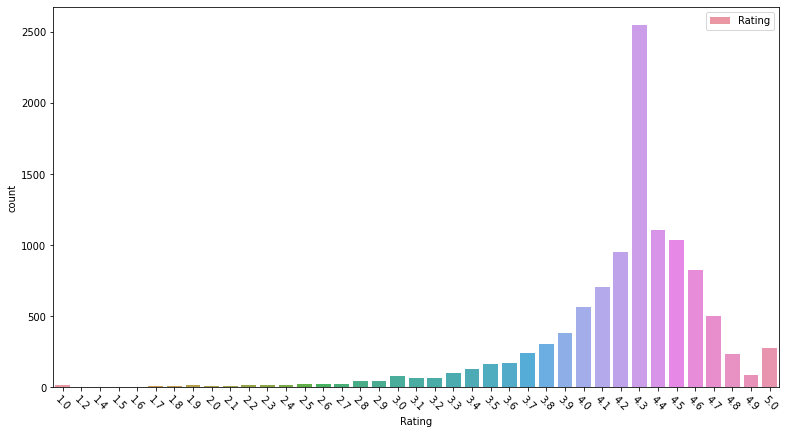

In [99]:
plt.figure(figsize=(13,7))
sns.countplot(dataplay['Rating'], label = "Rating")
plt.legend(loc= 'best')
plt.xticks(rotation= -45)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


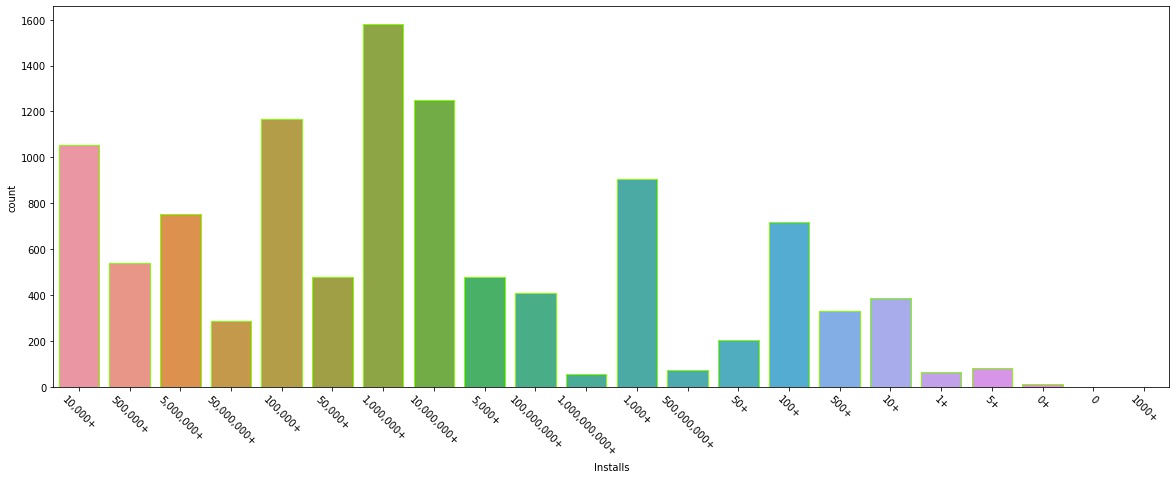

In [100]:
plt.figure(figsize=(20,7))
sns.countplot(dataplay['Installs'], edgecolor = "#7FFF00")
plt.xticks(rotation = -45)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


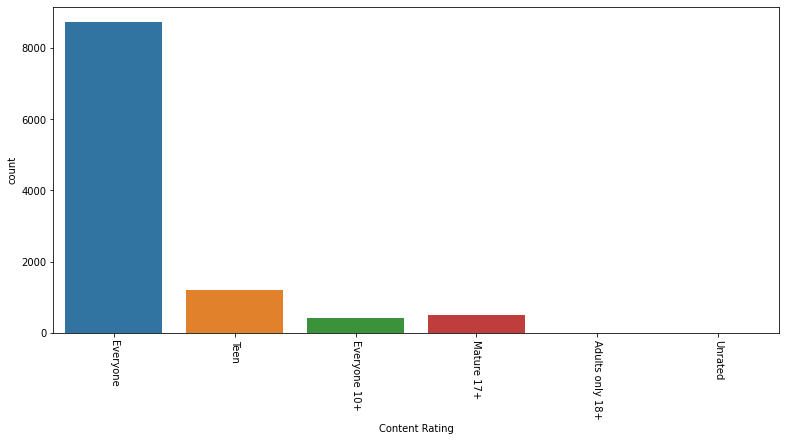

In [101]:
plt.figure(figsize=(13,6))
sns.countplot(dataplay['Content Rating'])
plt.xticks(rotation=-90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


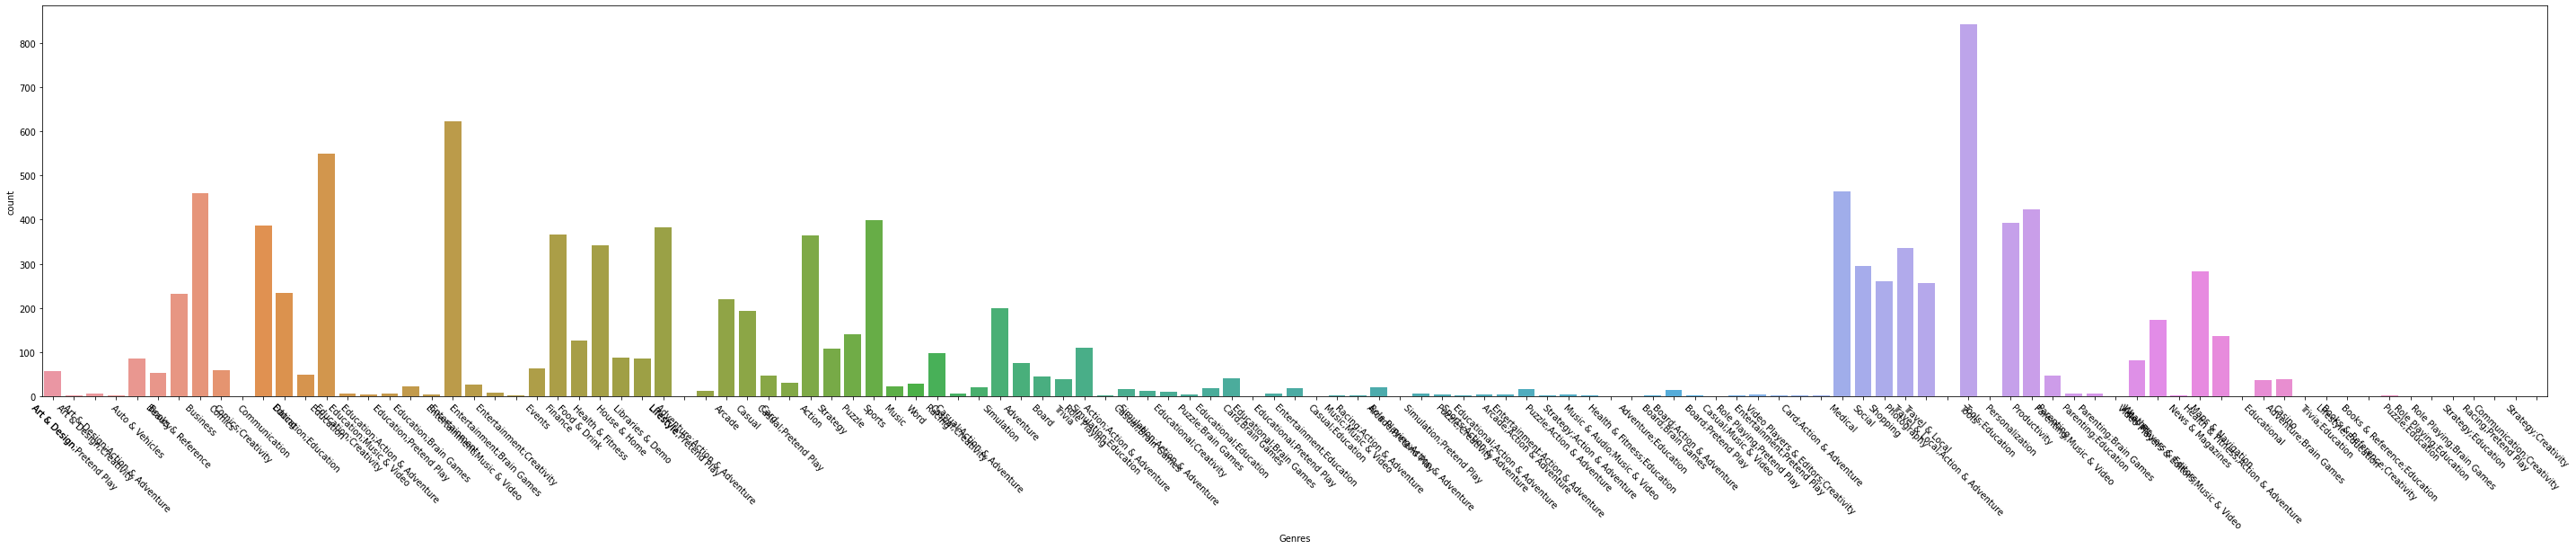

In [102]:
plt.figure(figsize=(50,8))
sns.countplot(dataplay['Genres'])
plt.xticks(rotation = -45)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


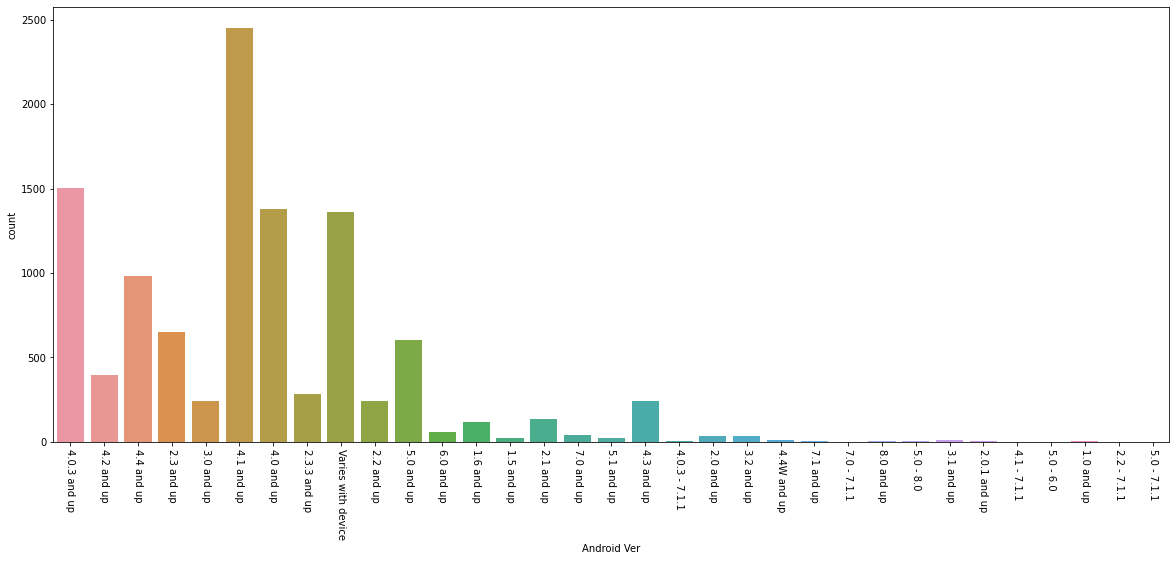

In [103]:
plt.figure(figsize=(20,8))
sns.countplot(dataplay['Android Ver'])
plt.xticks(rotation = -90)
plt.show()

def change_size(d):
    if "M" in d:
        d = d.replace("M","")
        try:
            d = int(d)*10**6
            return d
        except ValueError:
            d = int(float(d)*10**6)
            return d
    elif "k" in d:
        d = d.replace("k","")
        try:
            d = int(d)*1000
            return d
        except ValueError:
            d = int(float(d)*1000)
            return d
    else:
        d = 0
        return d

dataplay['Size'] = dataplay['Size'].apply( lambda x: change_size(x))
dataplay.head()

In [104]:
# function for replacing M in size as million and K as thousand
def change_size(d):
    if "M" in d:
        d = d.replace("M","")
        try:
            d = int(d)*10**6
            return d
        except ValueError:
            d = int(float(d)*10**6)
            return d
    elif "k" in d:
        d = d.replace("k","")
        try:
            d = int(d)*1000
            return d
        except ValueError:
            d = int(float(d)*1000)
            return d
    else:
        d = 0
        return d


In [105]:
dataplay['Size'] = dataplay['Size'].apply( lambda x: change_size(x))
dataplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [106]:
# Function to remove , and + from Installs
def remove_plus_and_comma(x):
    x = x.replace(",","")
    x = x.replace("+","")
    return int(x)
dataplay['Installs'] = dataplay['Installs'].apply(lambda x: remove_plus_and_comma(x))
dataplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [141]:
#Lets work on our categorical values: Category, Type, Content Rating, Genre
#Category:
dummy_C = pd.get_dummies(dataplay['Category'])
dataplay = pd.concat([dataplay , dummy_C], axis = 1)

In [142]:
#Type
dummy_T = pd.get_dummies(dataplay['Type'])
dataplay = pd.concat([dataplay, dummy_T], axis = 1) 

In [143]:
#Genres
dummy_G = pd.get_dummies(dataplay["Genres"])
dataplay = pd.concat([dataplay, dummy_G], axis = 1)

In [144]:
#Content Rating
dummy = pd.get_dummies(dataplay['Content Rating'])
dataplay = pd.concat([dataplay, dummy], axis = 1)

In [145]:
datamodel = dataplay.drop(["Category", "Type", "Content Rating", "Genres", "App", "Last Updated", "Current Ver", "Android Ver"], axis =1)
datamodel

,Rating,Reviews,Size,Installs,Price,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,Free,Action,Action;Action & Adventure,...,Puzzle;Brain Games,Puzzle;Creativity,Puzzle;Education,Racing,Racing;Action & Adventure,Racing;Pretend Play,Role Playing,Role Playing;Action & Adventure,Role Playing;Brain Games,Role Playing;Education,Role Playing;Pretend Play,Shopping,Simulation,Simulation;Action & Adventure,Simulation;Education,Simulation;Pretend Play,Social,Sports,Sports;Action & Adventure,Strategy,Strategy;Action & Adventure,Strategy;Creativity,Strategy;Education,Tools,Tools;Education,Travel & Local,Travel & Local;Action & Adventure,Trivia,Trivia;Education,Video Players & Editors,Video Players & Editors;Creativity,Video Players & Editors;Music & Video,Weather,Word,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,4.1,159,19000000,10000,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,3.9,967,14000000,500000,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,4.7,87510,8700000,5000000,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4.5,215644,25000000,50000000,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4.3,967,2800000,100000,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,4.5,38,53000000,5000,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10837,5.0,4,3600000,100,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10838,4.3,3,9500000,1000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10839,4.5,114,0,1000,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Predicting Ratings using Regression models: Linear Regression, Random Forest Regression

In [148]:
from sklearn.model_selection import train_test_split
X = datamodel.loc[:, datamodel.columns != "Rating"]
y = datamodel['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

      Reviews      Size    Installs  ...  Mature 17+  Teen  Unrated
4610    18522         0     1000000  ...           0     1        0
341   3419249         0  1000000000  ...           0     0        0
1084    31804   9800000     5000000  ...           0     0        0
2099    58795  77000000    10000000  ...           0     0        0
8437    41683  63000000     1000000  ...           0     0        0
...       ...       ...         ...  ...         ...   ...      ...
9372    13388   7100000      500000  ...           0     0        0
7291        1   2300000         100  ...           0     0        0
1344    77563  39000000    10000000  ...           0     0        0
7293        6   1100000        1000  ...           0     0        0
1289   559186         0    10000000  ...           0     0        0

[7588 rows x 958 columns]
      Reviews      Size  Installs  ...  Mature 17+  Teen  Unrated
212      6903  14000000   1000000  ...           0     0        0
6547    33661  60000000  

In [153]:
#Let's make the linear model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train, y_train)
print(model)
y_predict = model.predict(X_test)
print('predicted values: ',y_predict)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
predicted values:  [4.16444311 4.13049442 4.28767842 ... 4.18492275 4.16668492 4.1350108 ]


In [154]:
predict_dataframe = pd.DataFrame(data={"Predicted": y_predict, "Actual": y_test})
predict_dataframe

,Predicted,Actual
212,4.164443,4.1
6547,4.130494,4.4
2378,4.287678,4.5
5744,4.073981,4.2
3793,4.164898,4.2
...,...,...
4965,4.203828,4.3
3001,4.243882,3.3
2811,4.184923,4.7
3777,4.166685,3.9


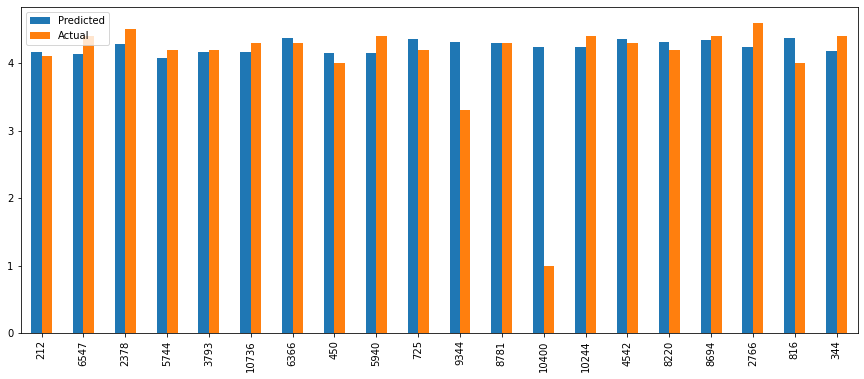

In [155]:
predict_dataframe[:20].plot(kind = "bar", figsize = (15,6))

In [156]:
model.score(X_test, y_test)

0.041227919372785804

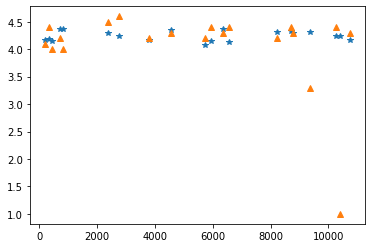

In [157]:
plt.plot(predict_dataframe["Predicted"][:20], "*")
plt.plot(predict_dataframe['Actual'][:20], "^")
plt.show()

In [158]:
#Lets make Random Forest Regresor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
modef_rfr = rfr.fit(X_train, y_train)
y_predict_rfr = modef_rfr.predict(X_test)
rfr_df = pd.DataFrame(data={"Predicted": y_predict_rfr, "Actual": y_test})
rfr_df

,Predicted,Actual
212,4.004,4.1
6547,4.555,4.4
2378,4.262,4.5
5744,3.943,4.2
3793,4.481,4.2
...,...,...
4965,4.518,4.3
3001,3.798,3.3
2811,4.339,4.7
3777,4.144,3.9


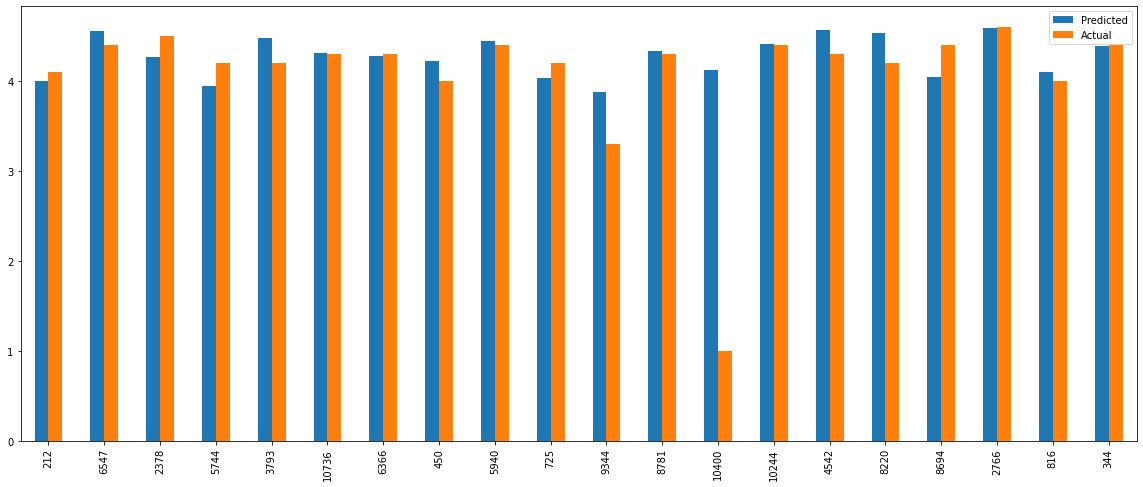

In [159]:
rfr_df[:20].plot(kind = "bar", figsize = (20,8))

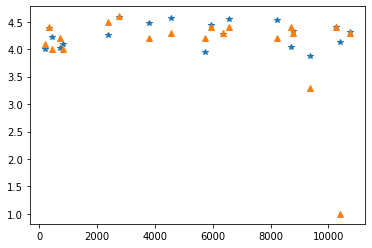

In [160]:
plt.plot(rfr_df["Predicted"][:20], "*")
plt.plot(rfr_df['Actual'][:20], "^")
plt.show()

In [161]:
#Accuracy
modef_rfr.score(X_test, y_test)

0.13496755196562027

In [162]:
#Model Scores and Conclusion
print("Linear Regression Score: ", model.score(X_test, y_test))
print("Random Forest Regressor Score: ", modef_rfr.score(X_test, y_test))

Linear Regression Score:  0.041227919372785804
Random Forest Regressor Score:  0.13496755196562027
